In [1]:
import numpy as np
import pandas as pd

import scipy.interpolate

from matplotlib import pyplot as plt
from astropy import units as u
from matplotlib import rcParams

In [2]:
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=False
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [3]:
dat=pd.read_csv('map1.csv',na_values='cal')

In [4]:
def conv(ra_hr,ra_min,ra_s):
    ra=ra_hr
    ra+=ra_min/60.
    ra+=ra_s/60./60.
    return ra

ras=conv(dat['ra_hr'],dat['ra_min'],dat['ra_sec'])
decs=dat['dec']
fds=dat['flux_den']*500./36.

np.savetxt('out.csv',zip(ras,decs,fds),delimiter=',')

# Best Plot

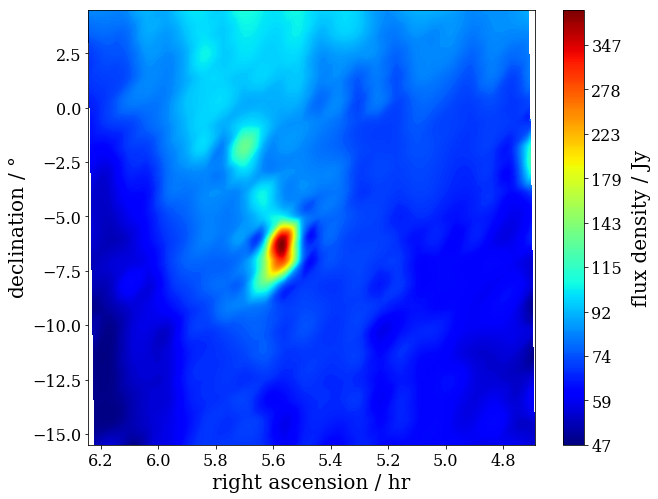

In [5]:
X=np.array(ras)
Y=np.array(decs)
Z=np.log10(np.array(fds)) #get flux density on a log scale

# create x-y points to be used in heatmap
xi = np.linspace(X.min(), X.max(), 1000)
yi = np.linspace(Y.min(), Y.max(), 1000)

# Z is a matrix of x-y values
zi = scipy.interpolate.griddata((X, Y), Z, 
                                (xi[None,:], yi[:,None]), \
                                method='cubic')

# Create the contour plot
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
#im=ax.contourf(xi, yi, zi, 256, cmap=plt.cm.rainbow)
im=ax.contourf(xi, yi, zi, 256, cmap='jet')
ax.invert_xaxis() 
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('flux density / Jy',labelpad=10.)
#Convert the scale bar from log Jy to Jy:
c=cbar.ax.yaxis.get_majorticklabels()
cbar.ax.yaxis.set_ticklabels(['{:,.0f}'.format(10.**float(c[i].get_text())) \
                              for i in np.arange(len(c))])
ax.set_xlabel('right ascension / hr')
ax.set_ylabel('declination / $\degree$')
plt.show()

# Other Plot Formats

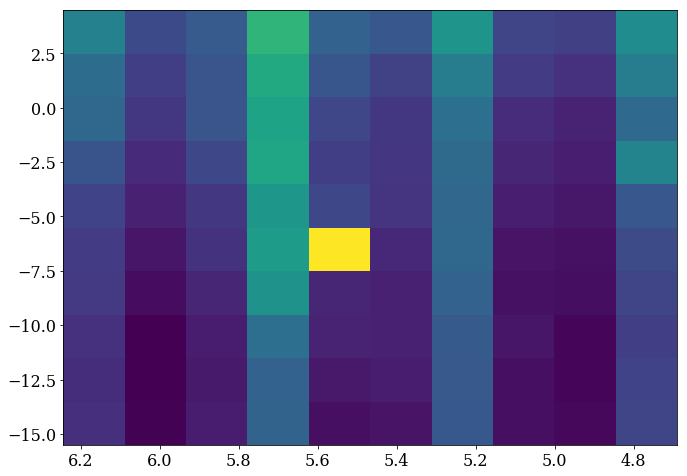

In [6]:
fig=plt.figure(figsize=(11,8))
ax=fig.add_subplot(111)
counts, xedges, yedges, im=ax.hist2d(ras,decs,weights=fds)
ax.invert_xaxis()
#plt.colorbar(im, ax=ax)
plt.show()

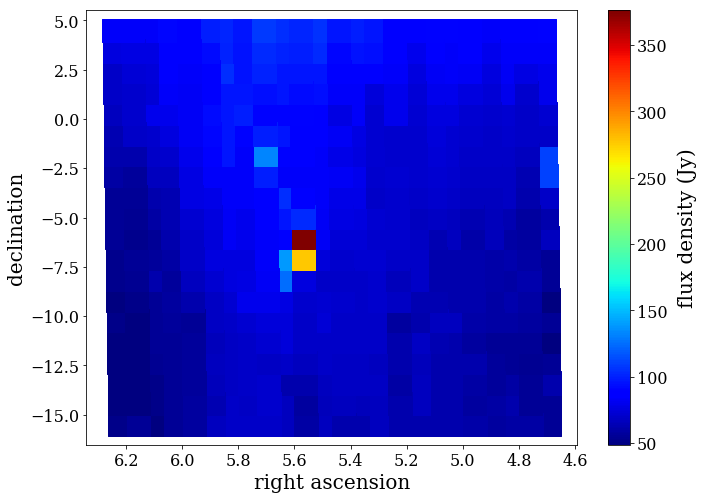

In [7]:
fig = plt.figure(figsize=(11,8))
ax=fig.add_subplot(111)
im=ax.scatter(ras,decs,c=fds,s=540,marker='s',cmap='jet',)
ax.set_ylabel('declination')
ax.invert_xaxis()
ax.set_xlabel('right ascension')
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('flux density (Jy)',labelpad=10.)
plt.show()